In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy

In [2]:
OAr = np.zeros((21,36))
OAb = np.zeros((21,36))
X_OAr = np.zeros((21,36))
X_OAb = np.zeros((21,36))


A  = np.zeros((21,2))
Mu = np.zeros((21,2))
Sig= np.zeros((21,2))
C  = np.zeros((21,2))
Mu_err = np.zeros((21,2))
Sig_err = np.zeros((21,2))

# Aquila_03

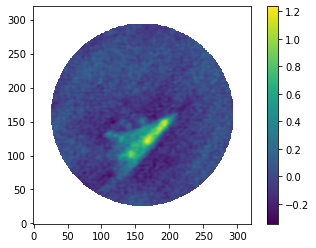

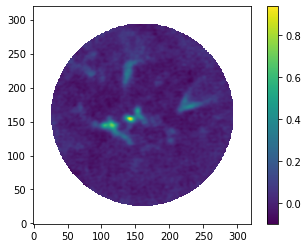

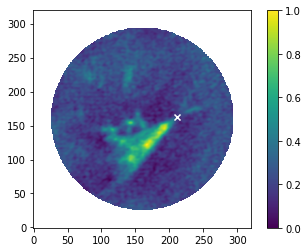

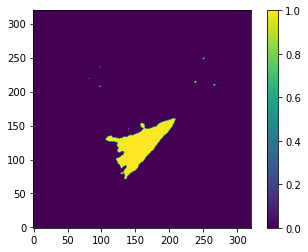

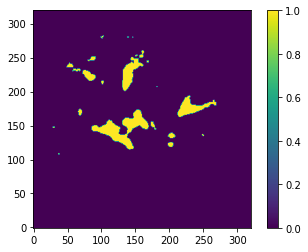

In [14]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_03_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_03_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="white", label="RA/Dec Mark")
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.2,1.0,0.0 )
maskr = np.where(image_datar > 0.08,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [15]:
image_header = fits.getheader(image_file_r, ext=0)
#image_header#['CRPIX1']

print(image_header['BUNIT'])

beam-1 Jy km s-1


In [16]:
#import skycoord, units, wcs, fits, from astropy
#from fits header create a wcs object
#using wcs object and ra dec inputs create a skycoord object
# wcsobj.worldttopix() convert the skycoord object to pixel x and y


from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename


f = fits.open(image_file_b)
image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

sky = SkyCoord('18 29 37.62	-1 50 59.55', unit=(u.hourangle, u.deg))
x_source, y_source = w.world_to_pixel(sky)

print(x_source, y_source) 

211.39979242885795 163.2125449008067


(320, 320)


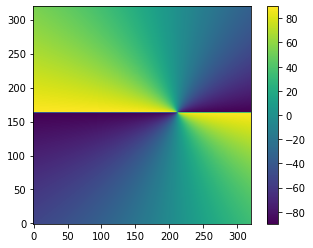

In [17]:
#print(image_header['CRPIX1'])
#print(image_header['CRPIX2'])

PA_grid = np.full((image_header['NAXIS1'],image_header['NAXIS2']),0.0)
print(PA_grid.shape)
 
for i in range(PA_grid.shape[0]):
    for j in range(PA_grid.shape[1]):
        x = i-y_source
        y = j-x_source
        if x ==0:
            #pass
            PA_grid[i][j] = -np.arctan(np.inf)/np.pi*180
        else:
            PA_grid[i][j] = -np.arctan(y/x)/np.pi*180
        
plt.imshow(PA_grid,origin='lower')
plt.colorbar()
plt.show()

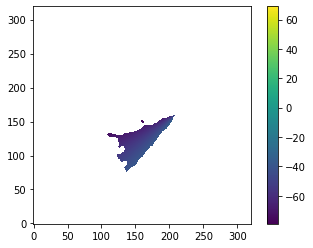

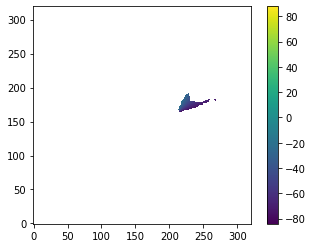

In [18]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
B[250:,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[:,0:210]=np.nan
plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

In [19]:
#print(len(binrange))

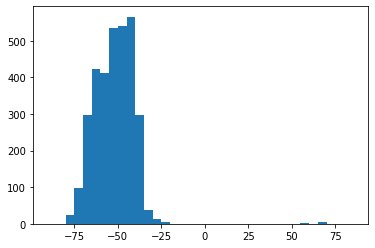

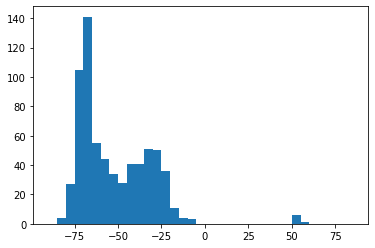

[  0.   0.  23.  97. 298. 423. 412. 534. 541. 566. 297.  37.  12.   4.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   0.   4.   0.   0.   0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [20]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(B.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

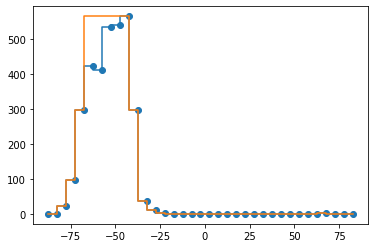

In [21]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:5], PA[-26:]))
y_subset = np.concatenate((outputb[0][:5], outputb[0][-26:]))
plt.plot(x_subset,y_subset, ds='steps')

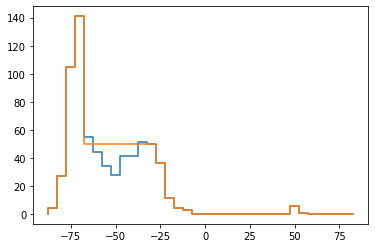

In [22]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:5], PA[-23:]))
y_subsetr = np.concatenate((outputr[0][:5], outputr[0][-23:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.13919234 0.18949305]


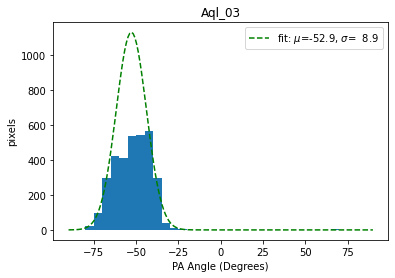

Std error [0.46674701 0.53863305]


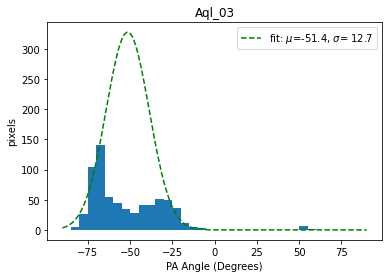

In [23]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[500,-60,25,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[50,-70,25,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [24]:
print(C)

[[-1.14823088 -0.01014642]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


Red Velocity Lobe
Largest Y Peak (Left of x=-50): 141.0
Corresponding x for Largest Y (Left of x=-50): 67.5
Largest Y Peak (Right of x=-50): 51.0
Corresponding x for Largest Y (Right of x=-50): 32.5 

Angle Measurement between peaks: 35.0 



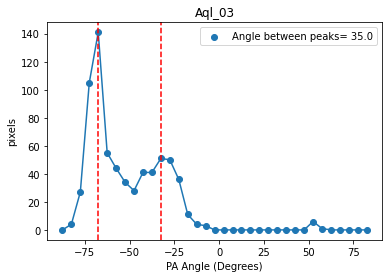

In [25]:
#Diego's Method

largest_y_left = float('-inf')  
largest_y_right = float('-inf')  

x_largest_left = 0
x_largest_right = 0


for x, y in zip(PA, outputr[0]):
    # Check if x is less than -50 (left side)
    if x < -50 and y > largest_y_left:
        largest_y_left = y
        x_largest_left = abs(x)
        x_marker1=x
    # Check if x is greater than -50 (right side)
    elif x > -50 and y > largest_y_right:
        largest_y_right = y
        x_largest_right = abs(x)
        x_marker2=x
    final=abs(x_largest_right-x_largest_left)

print("Red Velocity Lobe")
print("Largest Y Peak (Left of x=-50):", largest_y_left)
print("Corresponding x for Largest Y (Left of x=-50):", x_largest_left)
print("Largest Y Peak (Right of x=-50):", largest_y_right)
print("Corresponding x for Largest Y (Right of x=-50):", x_largest_right,"\n")
print("Angle Measurement between peaks:", final,"\n")

#Plot Red

plt.scatter(PA, outputr[0])
plt.plot(PA, outputr[0])
plt.legend(["Angle between peaks= " + str(final)], loc='upper right')
plt.axvline(x_marker1,ls='dashed', c='r')
plt.axvline(x_marker2,ls='dashed', c='r')
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_red_diff.pdf",dpi=300)

### Ring Masks

0.0016025641025641025 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.40675, -1.849875)>
Region: CirclePixelRegion
center: PixCoord(x=211.39979242885795, y=163.2125449008067)
radius: 41.208685685019574
(320, 320)


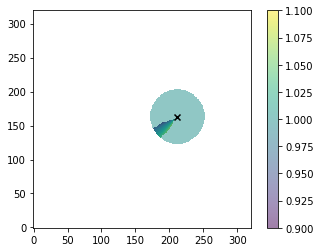

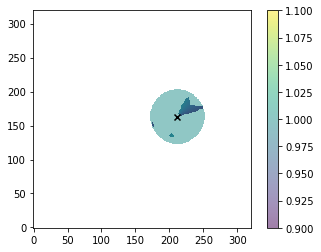

In [26]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 37.62 -1 50 59.55', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.00160256 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

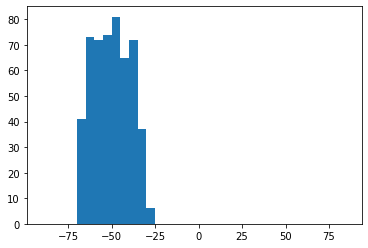

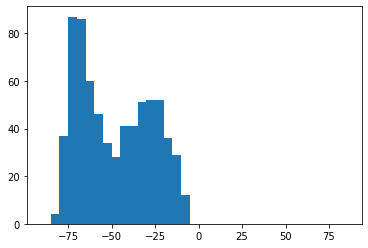

[ 0.  0.  0.  0. 41. 73. 72. 74. 81. 65. 72. 37.  6.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [27]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

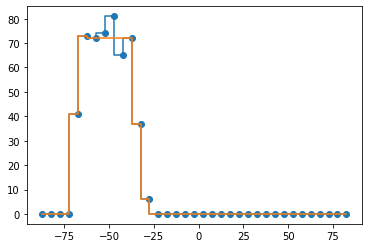

In [28]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:6], PA[-25:]))
y_subset = np.concatenate((outputb[0][:6], outputb[0][-25:]))
plt.plot(x_subset,y_subset, ds='steps')

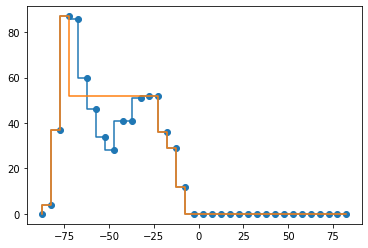

In [29]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:4], PA[-22:]))
y_subsetr = np.concatenate((outputr[0][:4], outputr[0][-22:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.17327063 0.33135123]


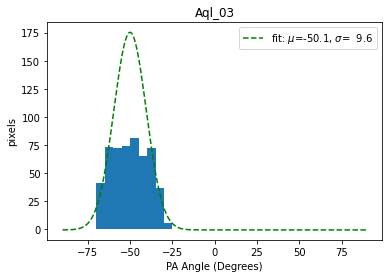

Std error [0.39264505 0.90732569]


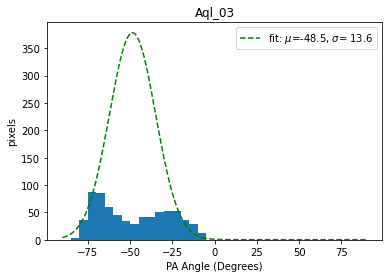

In [30]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-50,25,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-50,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

0.003205128205128205 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.40675, -1.849875)>
Region: CirclePixelRegion
center: PixCoord(x=211.39979242885795, y=163.2125449008067)
radius: 82.41757708432472
(320, 320)


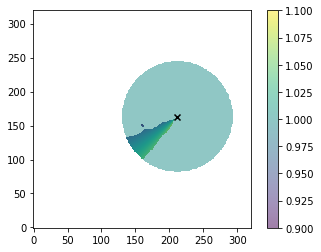

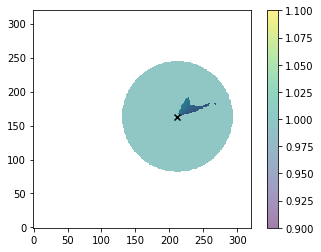

In [40]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 37.62 -1 50 59.55', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleSkyRegion(center=c, radius=0.003205128 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
maskedr[:,0:210]=np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
plt.colorbar()
plt.show()

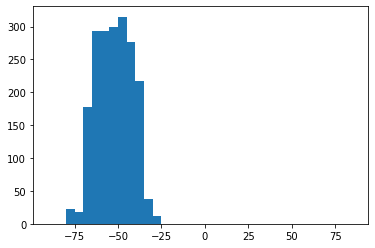

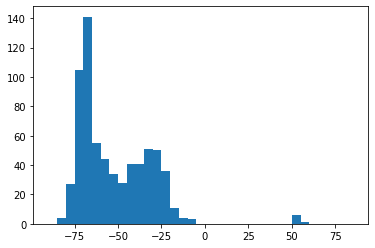

[  0.   0.  23.  18. 177. 293. 294. 299. 315. 277. 217.  37.  12.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [41]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

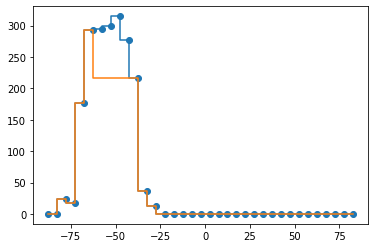

In [42]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:6], PA[-25:]))
y_subset = np.concatenate((outputb[0][:6], outputb[0][-25:]))
plt.plot(x_subset,y_subset, ds='steps')

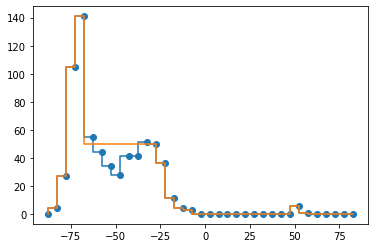

In [45]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((PA[:5], PA[-23:]))
y_subsetr = np.concatenate((outputr[0][:5], outputr[0][-23:]))
plt.plot(x_subsetr,y_subsetr, ds='steps')

Std error [0.23467597 0.37464376]


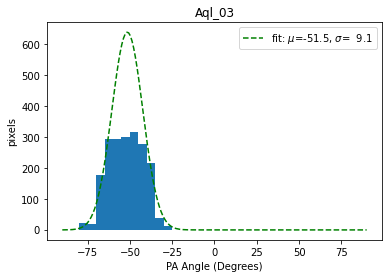

Std error [0.46674135 0.53862862]


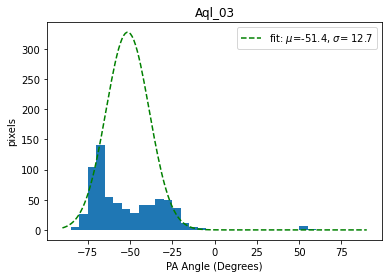

In [46]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-50,25,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]
#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-50,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

### Annulus mask

0.0016025641025641025 deg
0.003205128205128205 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (277.40675, -1.849875)>
Region: CircleAnnulusPixelRegion
center: PixCoord(x=211.39979242885795, y=163.2125449008067)
inner_radius: 41.20878854216236
outer_radius: 82.41737137003915
(320, 320)


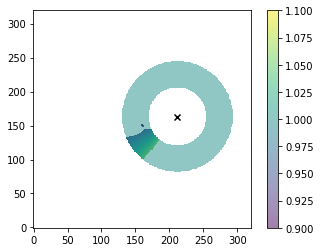

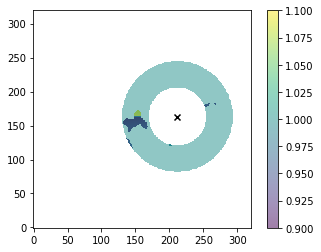

In [31]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

#Define Radius
distance=260.0
radial_cut1 = (1.5e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut1)
radial_cut2 = (3e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
print(radial_cut2)

B = PA_grid*maskb

from astropy.coordinates import SkyCoord
from astropy import units as u
from regions import PixCoord
from regions import CircleAnnulusSkyRegion, CirclePixelRegion
from astropy.wcs import WCS

image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

c = SkyCoord('18 29 37.62 -1 50 59.55', unit=(u.hourangle, u.deg))
print(c)
#center_sky = SkyCoord(277.34, -1.64, unit='deg', frame='icrs')
region_sky = CircleAnnulusSkyRegion(center=c, inner_radius=0.001602564 * u.deg,outer_radius=0.00320512 * u.deg)
pix_reg = region_sky.to_pixel(w)
print(pix_reg)
mask_sky=np.ones([image_header_b['NAXIS2'],image_header_b['NAXIS1']])*np.nan

for i in range(image_header_b['NAXIS2']):
    for j in range(image_header_b['NAXIS1']):
        pix=PixCoord(x=j,y=i)
        if pix in pix_reg:
            mask_sky[i][j]=1
    
maskedb=B*mask_sky
B[250:,:] =np.nan
print(mask_sky.shape)
                                                            
plt.imshow(maskedb,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower', alpha=0.5)
#add_scalebar(ax, scalebar_angle, label="1,000 au", color="black")
plt.colorbar()
plt.show()

R = PA_grid*maskr
maskedr=R*mask_sky
#R[:225,:] =np.nan
plt.imshow(maskedr,origin='lower')
plt.scatter(x_source, y_source, marker="x", color="black", label="RA/Dec Mark")
plt.imshow(mask_sky,origin='lower',alpha=0.5)
plt.colorbar()
plt.show()

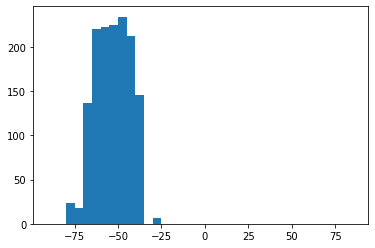

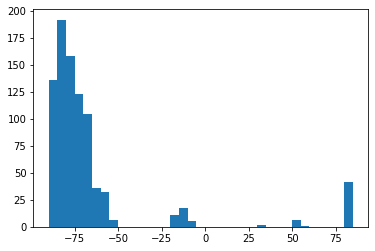

[  0.   0.  23.  18. 136. 220. 222. 225. 234. 212. 145.   0.   6.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85]
35 36
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]


In [32]:
binrange = np.arange(-90,90,5)
outputb = plt.hist(maskedb.flatten(),bins=binrange)

plt.show()


outputr = plt.hist(maskedr.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)
PA2=np.arange(-90,260,5)#(astropy.coordinates) #— Astropy v5.3.3

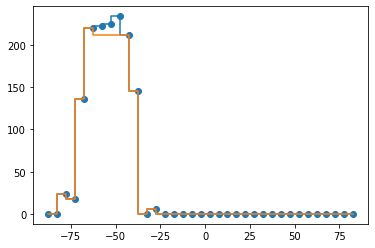

In [33]:
#BLUE

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0],ds='steps')
plt.scatter(PA,outputb[0])
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

#centr=np.where(PA==-2.5)[0][0]

#flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

#flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
#print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
#plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
#plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subset = np.concatenate((PA[:6], PA[-26:]))
y_subset = np.concatenate((outputb[0][:6], outputb[0][-26:]))
plt.plot(x_subset,y_subset, ds='steps')

Std error [0.26872492 0.43824062]


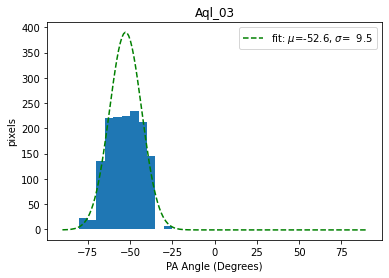

In [34]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c
#BLUEcompleted
plt.figure()
plt.hist(maskedb.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,-50,25,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


textred='''#RED
plt.figure()
plt.hist(maskedr.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,-50,40,1], maxfev=100000)
x = np.linspace(-90,90,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_03")
plt.savefig("Aql_03_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]'''